In [2]:
import pandas as pd # data manipulation
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np #  mathematical support for large, multi-dimensional arrays and matrices
import os

In [3]:
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import collections

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-lp4tih6f because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor 
import re

### Set Directory

In [5]:
os.getcwd()

'/scratch/interns202010/jmakins/jupyter-dir'

In [6]:
try:
    os.chdir('/group/interns202010/jmakins/Data')
except:
    pass

In [7]:
os.listdir()

['world_soccer_database.sqlite',
 'events',
 'referees.json',
 'players_old.json',
 'players.json',
 'competitions.json',
 'teams.json',
 'coaches.json',
 'players_old.csv',
 'matches',
 '.DS_Store']

In [8]:
Teams = pd.read_json('teams.json')
Competitions = pd.read_json('competitions.json')
Players = pd.read_json('players.json')
Coaches = pd.read_json('coaches.json') # Managers

In [12]:
try:
    os.chdir('/group/interns202010/jmakins/Data/matches')
except:
    pass
England = pd.read_json('matches_England.json')
France = pd.read_json('matches_France.json')
Italy = pd.read_json('matches_Italy.json')
Spain = pd.read_json('matches_Spain.json')
Germany = pd.read_json('matches_Germany.json')
#World_Cup = pd.read_json('matches_World_Cup.json')
#Euro_Champs = pd.read_json('matches_European_Championship.json')

In [13]:
# Adding country labels to match observations
England['Country'] = 'England'
France['Country'] = 'France'
Italy['Country'] = 'Italy'
Spain['Country'] = 'Spain'
Germany['Country'] = "Germany"
#World_Cup['Country'] = 'World Cup'
#Euro_Champs['Country'] = 'European Champs'

In [14]:
try:
    os.chdir('/group/interns202010/jmakins/Data/events')
except:
    pass

In [15]:
#test = pd.read_json('events_England.json')

In [16]:
## IF Topaz goes down, use Kaggle GPU ##

# os.chdir('/kaggle/input/football-event-data')

# Teams = pd.read_json('teams.json')
# Competitions = pd.read_json('competitions.json')
# Players = pd.read_json('players.json')
# Coaches = pd.read_json('coaches.json') # Managers

# England = pd.read_json('matches_England.json')
# France = pd.read_json('matches_France.json')
# Italy = pd.read_json('matches_Italy.json')
# Spain = pd.read_json('matches_Spain.json')
# Germany = pd.read_json('matches_Germany.json')

# England['Country'] = 'England'
# France['Country'] = 'France'
# Italy['Country'] = 'Italy'
# Spain['Country'] = 'Spain'
# Germany['Country'] = "Germany"

In [17]:
#Matches.loc[((Matches['homeTeamId']==1644) & (Matches['awayTeamId']==1659)) | ((Matches['homeTeamId']==1659) & (Matches['awayTeamId']==1644))]


In [18]:
#Events_England[Events_England['matchId']==2500037]

In [19]:
#Events_England[(Events_England['subEventDescription'].str.match('goal ')) & (Events_England['Result']=="Failure") & (Events_England['subEventName']=="Shot")]


In [20]:
#Events_England.loc[(Events_England['subEventDescription'].str.match("goal ")) & (Events_England['Result']=="Success")].subEventName.unique()


In [21]:
Events_France = pd.read_json('events_France.json')
Events_Spain = pd.read_json('events_Spain.json')
Events_Germany = pd.read_json('events_Germany.json')
#Events_EuroChamps = pd.read_json('events_European_Championship.json')
#Events_World_Cup = pd.read_json('events_World_Cup.json')
Events_Italy = pd.read_json('events_Italy.json')
Events_England = pd.read_json('events_England.json')

In [22]:
## We have a function for this now further down to be applied across all european regions

## Solution to convert second half time into 
# secs_to_add = list(Events_England[Events_England['matchPeriod']=="1H"].groupby('matchId').tail(1)['eventSec'])
# match_ids = list(Events_England["matchId"].unique())

# for idx in range(0, len(match_ids)):
#     Events_England['eventSec'] = list(np.where(
#        (Events_England['matchId'] == match_ids[idx]) & (Events_England['matchPeriod'] == "2H") , Events_England['eventSec'] + secs_to_add[idx], Events_England['eventSec']
#        ))

In [23]:
# Example of an events table
Events_England[Events_England['matchId'] == 2499719].tail()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
1763,8,Launch,[{'id': 1802}],8480,"[{'y': 53, 'x': 7}, {'y': 49, 'x': 46}]",2499719,Pass,1631,2H,2992.491575,84,177961040
1764,8,Head pass,[{'id': 1801}],49876,"[{'y': 51, 'x': 54}, {'y': 58, 'x': 73}]",2499719,Pass,1609,2H,2994.900590,82,177961035
1765,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1216}, {'id'...",7870,"[{'y': 58, 'x': 73}, {'y': 0, 'x': 0}]",2499719,Shot,1609,2H,2997.086392,100,177961036
1766,5,Ball out of the field,[],0,"[{'y': 48, 'x': 3}, {'y': 100, 'x': 100}]",2499719,Interruption,1631,2H,2998.963701,50,177961041
1767,3,Goal kick,[],8480,"[{'y': 100, 'x': 100}, {'y': 100, 'x': 100}]",2499719,Free Kick,1631,2H,3006.647279,34,177961042


### Data Cleaning

In [24]:
Matches = pd.concat([England, France, Italy, Spain, Germany], ignore_index=True)

In [25]:
Matches.drop(['duration'], inplace=True, axis =1) # removing groupName variable from World Cups

In [26]:
Players.drop(["passportArea"], inplace = True, axis = 1)

In [27]:
Players = Players.rename(columns ={'wyId': 'playerId'}) # rename for convenience

In [28]:
Teams = Teams.rename(columns = {'wyId': 'teamId'})
Players = Players.rename(columns = {'currentTeamId': 'teamId'})
Players = pd.merge(Players,Teams[['teamId', 'officialName']], on = 'teamId').rename(columns = {'officialName': 'clubName'})

In [29]:
Players['Position'] = Players.role.apply(pd.Series)['code3'].values

In [30]:
Players['birthCountry'] = Players.birthArea.apply(pd.Series)['name'].values

In [31]:
Players.drop(["birthArea", 'role'], inplace = True, axis = 1)

### Manipulate Match Data

In [32]:
teams = [list(x.keys()) for x in Matches.teamsData] # create two columns for identifying teams in match

In [33]:
teams = [list(x.keys()) for x in Matches.teamsData] # create two columns for identifying teams in match
homeTeam, awayTeam = [],[]
for x in teams:
    homeTeam.append(x[0])
    awayTeam.append(x[1])

In [34]:
# add columns for additional match statistics
Matches["homeManagerId"] = None
for name in ["Score", "ScoreHT", "ScoreET", "ScoreP"]:
    colname = "home" + name
    colname2 = "away" + name
    Matches[colname] = None
    Matches[colname2] = None

In [35]:
# parse Home and Away teams as features from nest dictionary
teams = [list(x.keys()) for x in Matches.teamsData] # create two columns for identifying teams in match
homeTeam, awayTeam = [],[]
for game, team in enumerate(teams):
    if Matches.teamsData[game:game+1][game][team[0]]['side'] == 'home':
        homeTeam.append(team[0])
        awayTeam.append(team[1])
    else:
        awayTeam.append(team[0])
        homeTeam.append(team[1])

In [36]:
def get_team_stats(df, team): # function to parse team match stats from dictionary embedded in column teamsData from the Matches dataframe
    
    Bench, Starters, Manager, Score, ScoreHT, ScoreET, ScoreP, teamId = [],[],[],[],[],[],[],[]
    
    for game in range(0, len(df)):

        Bench.append(list(pd.DataFrame.from_dict(df.teamsData[game][team[game]]['formation']['bench'])['playerId']))
        Starters.append(list(pd.DataFrame.from_dict(df.teamsData[game][team[game]]['formation']['lineup'])['playerId']))
        Manager.append(df.teamsData[game][team[game]]['coachId'])
        Score.append(df.teamsData[game][team[game]]['score'])
        ScoreHT.append(df.teamsData[game][team[game]]['scoreHT'])
        ScoreET.append(df.teamsData[game][team[game]]['scoreET'])
        ScoreP.append(df.teamsData[game][team[game]]['scoreP'])
        teamId.append(df.teamsData[game][team[game]]['teamId'])
    
    return Bench, Starters, Manager, Score, ScoreHT, ScoreET, ScoreP, teamId

homeBench, homeStarters, homeManager, homeScore, homeScoreHT, homeScoreET, homeScoreP, homeTeamId = get_team_stats(Matches, homeTeam)
awayBench, awayStarters, awayManager, awayScore, awayScoreHT, awayScoreET, awayScoreP, awayTeamId = get_team_stats(Matches, awayTeam)


In [37]:
# Automating Bench Line Up Column Generation

homeColNames = []
for num in range(1,14): # add columns for home bench playerId
     homeColNames.append("homeBenchPlayer" + str(num))
        
awayColNames = []
for num in range(1,14): # add columns for away bench playerId
    awayColNames.append("awayBenchPlayer" + str(num))
    


In [38]:
# Inspecting bench counts as during errror handling reveals some matches had bench sizes of between 8 and 13 for certain fixtures
import collections
collections.Counter(list(map(lambda x: len(x), homeBench)))

Counter({7: 1425, 6: 18, 5: 1, 8: 5, 12: 205, 10: 49, 11: 101, 9: 21, 13: 1})

In [39]:
# Adding Bench Line Ups to DataFrame

homeBench2 = pd.DataFrame(homeBench,
     columns=homeColNames)
awayBench2 = pd.DataFrame(awayBench,
     columns=awayColNames)


In [40]:
# Automating Starting Line Up Column Generation

homeColNames =[]
for num in range(1,12): # add columns for starting playerId
     homeColNames.append("homePlayer" + str(num))
        
awayColNames = []
for num in range(1,12): # add columns for starting playerId
    awayColNames.append("awayPlayer" + str(num))


In [41]:
# Joining starting line ups, benches to matches dataframe

homeStarters2 = pd.DataFrame(homeStarters,
     columns=homeColNames)
awayStarters2 = pd.DataFrame(awayStarters,
     columns=awayColNames)

Matches = Matches.join([homeStarters2, awayStarters2, homeBench2, awayBench2])


In [42]:
# add individual columns of match data
Matches['homeManager'] = homeManager
Matches['homeScore'] = homeScore
Matches['homeScoreHT'] = homeScoreHT
Matches['homeScoreET'] = homeScoreET
Matches['homeScoreP'] = homeScoreP
Matches['homeTeamId'] = homeTeamId
Matches['awayManager'] = awayManager
Matches['awayScore'] = awayScore
Matches['awayScoreHT'] = awayScoreHT
Matches['awayScoreET'] = awayScoreET
Matches['awayScoreP'] = awayScoreP
Matches['awayTeamId'] = awayTeamId

In [43]:
Matches.drop(["teamsData"], inplace = True, axis = 1)

In [44]:
# Classify Match Result as W, L or D for teams
conditions = [
    (Matches['winner'] == 0),
    (Matches['winner'] == Matches['awayTeamId']),
    (Matches['winner'] == Matches['homeTeamId'])
    ]

# create a list of the values we want to assign for each condition
values = [0, -1, 1]

# create a new column and use np.select to assign values to it using our lists as arguments
Matches['Result'] = np.select(conditions, values)

###### Relating table to access Referee Data

In [45]:
# os.chdir('/group/interns202010/jmakins/Data')

In [46]:

# sql_conn = sqlite3.connect('world_soccer_database.sqlite') # soccer database containing over 100,000 match results which is updated monthly

# Match_TeamStats = pd.read_sql_query("SELECT * FROM football_data", sql_conn)

# # parsing betting odds variables from analysis
# drop_columns = ["B365H","B365D","B365A","BSH","BSD","BSA","BWH","BWD","BWA","GBH","GBD","GBA","IWH","IWD","IWA","LBH","LBD","LBA",
# "PSH", "PH","PSD", "PD","PSA", "PA","SOH","SOD","SOA","SBH","SBD","SBA","SJH","SJD","SJA","SYH","SYD","SYA","VCH",
# "VCD","VCA","WHH","WHD","WHA","Bb1X2","BbMxH","BbAvH","BbMxD","BbAvD","BbMxA","BbAvA","MaxH","MaxD","MaxA",
# "AvgH","AvgD","AvgA","BbOU","BbMx>2.5","BbAv>2.5","BbMx<2.5","BbAv<2.5","GB>2.5","GB<2.5","B365>2.5","B365<2.5",
# "P>2.5","P<2.5","Max>2.5","Max<2.5","Avg>2.5","Avg<2.5","BbAH","BbAHh","AHh","BbMxAHH","BbAvAHH","BbMxAHA",
# "BbAvAHA","GBAHH","GBAHA","GBAH","LBAHH","LBAHA","LBAH","B365AHH","B365AHA","B365AH","PAHH", "AvgC<2.5",
# "PAHA","MaxAHH","MaxAHA","AvgAHH","AvgAHA","WHCH","WHCD","WHCA", "VCCH", "VCCA", "PSCH", "PSCD", "PCAHH", "PCAHA", "PC>2.5", "PC<2.5", "MaxCH", "MaxCAHH", "MaxCD",
# "MaxCAHA", "MaxCA", "MaxC>2.5", "MaxC<2.5", "IWCH", "IWCD", "IWCA", "AvgC>2.5","AvgCA","AvgCAHA","AvgCAHH",
# "AvgCD","AvgCH","B365C<2.5","B365C>2.5","B365CA","B365CAHA","B365CAHH","B365CD","B365CH","BWCA", "BWCD", "BWCH", "VCCD", "PSCA"] 

# Match_TeamStats.drop(drop_columns, inplace=True, axis =1) # removing betting odds from dataframe





In [47]:
# Match_TeamStats = Match_TeamStats[Match_TeamStats['Datetime'].str.contains('2017|2018')]

In [48]:
Matches["date"] = pd.to_datetime(Matches['dateutc']).dt.date # create a date column for Matches dataframe

In [49]:
Matches["time"] = pd.to_datetime(Matches['dateutc']).dt.time # create a time column for Matches dataframe

In [50]:
# Prelim Dimensionality Reduction
cols2Drop = ['status', 'roundId', 'gameweek', 'dateutc', 'label', 'referees', 'homeManagerId', 'seasonId']
Matches.drop(cols2Drop, inplace=True, axis =1)
Matches.drop(['winner', 'date', 'time'], inplace = True, axis =1)

In [51]:
Matches.rename(columns={'wyId':'matchId'}, inplace=True)

In [52]:
Matches = Matches.fillna(0) # fill bench7players with Ids = 0 in order to prevent program crashing

In [53]:
# Match_TeamStats['date'] = pd.to_datetime(Match_TeamStats['Datetime']).dt.date

In [54]:
# # Get Referee and Home/Away Team Information
# Match_TeamStats.merge(Matches, how = "inner", indicator = False)

In [55]:
# Matches = Match_TeamStats.merge(Matches, how = "inner", indicator = False)

In [56]:
# Matches.drop(['gameweek', 'seasonId', 'dateutc', 'label', 'Season', 'status', 'roundId'], inplace= True, axis =1)

In [57]:
# Matches.drop(['Datetime', 'Div','FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR', 'ABP', 'AC',
#        'AF', 'AFKC', 'AHCh', 'AHW', 'AO', 'AR', 'AS', 'AST', 'AT', 'AY',
#        'Attendance', 'Date', 'HBP', 'HC', 'HF', 'HFKC', 'HHW', 'HO', 'HR',
#        'HS', 'HST', 'HT', 'HY', 'Time', 'referees'], inplace= True, axis =1)

### Events Manipulation for Match/Player Stats and then combine with existing Match(test) dataframe from aboves

In [416]:
# Numberize match period
for df in [Events_England, Events_Italy, Events_France, Events_Germany, Events_Spain]:
    df['matchPeriod'][(df.matchPeriod == "1H")] = 1
    df['matchPeriod'][(df.matchPeriod == "2H")] = 2


In [388]:
Events_England.head()

,eventId,subEventName,playerId,matchId,teamId,matchPeriod,eventSec,subEventId,id,Result,subEventDescription,xStart,xEnd,yStart,yEnd,attackMetres,distance_to_goal,angle_to_goal,Goal_Value,lateralMetres
0,8,Simple pass,25413,2499719,1609,1,2.758649,85,177959171,Accurate,generic play,49,31,49,78,-18,51.01,0.1954,0,29
1,8,High pass,370224,2499719,1609,1,4.946850,83,177959172,Accurate,generic play,31,51,78,75,20,74.46,0.1244,0,3
2,8,Head pass,3319,2499719,1609,1,6.542188,82,177959173,Accurate,generic play,51,35,75,71,-16,55.01,0.1619,0,4
3,8,Head pass,120339,2499719,1609,1,8.143395,82,177959174,Accurate,generic play,35,41,71,95,6,68.31,0.1392,0,24
4,8,Simple pass,167145,2499719,1609,1,10.302366,85,177959175,Accurate,generic play,41,72,95,88,31,74.20,0.1072,0,7


In [59]:
Events_England['subEventName'].unique()

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Foul',
       'Free Kick', 'Cross', 'Shot', 'Reflexes', 'Touch', 'Clearance',
       'Ball out of the field', 'Throw in', 'Goal kick', 'Corner',
       'Goalkeeper leaving line', 'Hand pass', 'Acceleration',
       'Save attempt', '', 'Free kick cross', 'Free kick shot',
       'Hand foul', 'Violent Foul', 'Protest', 'Whistle',
       'Late card foul', 'Out of game foul', 'Penalty', 'Time lost foul',
       'Simulation'], dtype=object)

In [60]:
# Decroos Github
tags = [
    (101, "goal"),
    (102, "own_goal"),
    (301, "assist"),
    (302, "key_pass"),
    (1901, "counter_attack"),
    (401, "left_foot"),
    (402, "right_foot"),
    (403, "head/body"),
    (1101, "direct"),
    (1102, "indirect"),
    (2001, "dangerous_ball_lost"),
    (2101, "blocked"),
    (801, "high"),
    (802, "low"),
    (1401, "interception"),
    (1501, "clearance"),
    (201, "opportunity"),
    (1301, "feint"),
    (1302, "missed_ball"),
    (501, "free_space_right"),
    (502, "free_space_left"),
    (503, "take_on_left"),
    (504, "take_on_right"),
    (1601, "sliding_tackle"),
    (601, "anticipated"),
    (602, "anticipation"),
    (1701, "red_card"),
    (1702, "yellow_card"),
    (1703, "second_yellow_card"),
    (1201, "position_goal_low_center"),
    (1202, "position_goal_low_right"),
    (1203, "position_goal_mid_center"),
    (1204, "position_goal_mid_left"),
    (1205, "position_goal_low_left"),
    (1206, "position_goal_mid_right"),
    (1207, "position_goal_high_center"),
    (1208, "position_goal_high_left"),
    (1209, "position_goal_high_right"),
    (1210, "position_out_low_right"),
    (1211, "position_out_mid_left"),
    (1212, "position_out_low_left"),
    (1213, "position_out_mid_right"),
    (1214, "position_out_high_center"),
    (1215, "position_out_high_left"),
    (1216, "position_out_high_right"),
    (1217, "position_post_low_right"),
    (1218, "position_post_mid_left"),
    (1219, "position_post_low_left"),
    (1220, "position_post_mid_right"),
    (1221, "position_post_high_center"),
    (1222, "position_post_high_left"),
    (1223, "position_post_high_right"),
    (901, "through"),
    (1001, "fairplay"),
    (701, "lost"),
    (702, "neutral"),
    (703, "won"),
    (1801, "accurate"),
    (1802, "not_accurate"),
]

In [61]:
tags = dict(tags)

In [62]:
# ## I have kept this cell encase we need to impute integers for ML algorithms as oppose to strings
# event_tag_ids = []
# for ids in  list(trial[0:10]['tags']):
#     event_tag_ids.append(list(map(lambda y: y['id'], ids)))
# trial['event_tag_ids'] = event_tag_ids

In [63]:
# Store event type tags ids in new column
def event_tags(event_df):
    event_tags = []
    for ids in list(event_df['tags']):
        event_tags.append(list(map(lambda y: tags[y['id']], ids)))

    event_df['event_tags'] = event_tags
    return event_df

In [64]:
def RunningTime(event_df):
    # Solution to convert second half time into 
    secs_to_add = list(event_df[event_df['matchPeriod']=="1H"].groupby('matchId').tail(1)['eventSec'])
    match_ids = list(event_df["matchId"].unique())

    for idx in range(0, len(match_ids)):
        event_df['eventSec'] = list(np.where(
           (event_df['matchId'] == match_ids[idx]) & (event_df['matchPeriod'] == "2H") , event_df['eventSec'] + secs_to_add[idx], event_df['eventSec']
           ))
    return event_df


In [65]:
# Clean the result of the action
def Result(event_df):
    result = []
    for tag in event_df["event_tags"]:
        if "accurate" in tag:
            result.append("Accurate")
        elif "not_accurate" in tag:
            result.append("Inaccurate")
        else:
            result.append("")
    event_df["Result"] = result 
    return event_df

In [66]:
# Separating description from success/failure of an action (event)
def event_description(event_df):
    subEventDescr = []
    for tag in event_df["event_tags"]:
        descr = " ".join(tag[:-1])
        if descr != "":
            subEventDescr.append(descr)
        else:
            subEventDescr.append("generic play")
    event_df["subEventDescription"] = subEventDescr
    event_df = event_df[(event_df["event_tags"].str.len() != 0) & (event_df.subEventName != 'Ball out of the field')  & (event_df.subEventName != 'Goal kick')  ]
    event_df = event_df[event_df["subEventName"] != "Throw in"] # remove throw-ins as a relevant feature among successful teams for simpler analysis, unless its Rory Delap!
    return event_df

In [69]:
collections.Counter(list(map(lambda x: len(x), Events_England['positions'])))

Counter({2: 643032, 1: 118})

In [71]:

def Locations(event_df):

    xStart,xEnd,yStart,yEnd = [], [], [], []
    for pos in event_df["positions"]:
        if len(pos) == 2:
            xStart.append(pos[0]['x'])
            xEnd.append(pos[1]['x'])
            yStart.append(pos[0]['y'])
            yEnd.append(pos[1]['y'])
        else:
            xStart.append(pos[0]['x'])
            xEnd.append(pos[0]['x'])
            yStart.append(pos[0]['y'])
            yEnd.append(pos[0]['y'])


    event_df['xStart'], event_df['xEnd'], event_df['yStart'], event_df['yEnd'] = xStart, xEnd, yStart, yEnd
    return event_df

In [75]:
# function to transform an event data frame
def event_df_transform(event_df):
    event_df = event_tags(event_df)
    event_df = Result(event_df)
    event_df = event_description(event_df)
    event_df = Locations(event_df)
    event_df.drop(['positions', "event_tags", "tags", "eventName"], inplace = True, axis = 1) #'id'
    event_df = event_df[event_df.subEventName != ""]
    event_df = event_df[event_df['playerId']!= 0]
    event_df = RunningTime(event_df)
    event_df['attackMetres'] = event_df['xEnd'] - event_df['xStart']
    return event_df

# stopped remove eventId
    

In [76]:
# Transform event_dfs

Events_France = event_df_transform(Events_France)
Events_Spain = event_df_transform(Events_Spain)
Events_Germany = event_df_transform(Events_Germany)
Events_Italy = event_df_transform(Events_Italy)
Events_England = event_df_transform(Events_England)



In [83]:
# function to determine average player coordinates on pitch across all possessions in a match
def playerPosition(event_df):
    df = event_df.groupby(['matchId','playerId']).agg({'xStart': ['mean'], 'yStart': ['mean']}).reset_index()
    df.columns = ["matchId", "playerId", "xStart", "yStart"]
    return df

In [84]:
# find positions for all players for big 5 Euro leagues
a = playerPosition(Events_England)
b = playerPosition(Events_France)
c = playerPosition(Events_Italy)
d = playerPosition(Events_Spain)
e = playerPosition(Events_Germany)

position_df =  pd.concat([a,b,c,d,e])

In [85]:
# This dataframe is used relationally to fill correct team as events represent 2018 team, while player
a = Events_England[['playerId', "teamId", 'matchId']].groupby(['playerId', "teamId", 'matchId']).count().reset_index()
b = Events_France[['playerId', "teamId", 'matchId']].groupby(['playerId', "teamId", 'matchId']).count().reset_index()
c = Events_Italy[['playerId', "teamId", 'matchId']].groupby(['playerId', "teamId", 'matchId']).count().reset_index()
d = Events_Spain[['playerId', "teamId", 'matchId']].groupby(['playerId', "teamId", 'matchId']).count().reset_index()
e = Events_Germany[['playerId', "teamId", 'matchId']].groupby(['playerId', "teamId", 'matchId']).count().reset_index()
p_refs = pd.concat([a,b,c,d,e])

In [230]:
Player_Aggs = Players[['shortName','Position', 'playerId','weight','height',  'foot' ]]

In [231]:
# add ave field locations to players
Player_Aggs = pd.merge(Player_Aggs, position_df, how = 'right', on= 'playerId').sort_values('matchId')
Player_Aggs = pd.merge(Player_Aggs, p_refs, on = ['matchId', 'playerId'])
Player_Aggs = pd.merge(Player_Aggs, Teams[['teamId', 'name']], on = 'teamId')

In [232]:
Player_Aggs = pd.merge(Player_Aggs, Matches[['matchId', 'homeTeamId', 'awayTeamId']], on = 'matchId')
Player_Aggs.loc[Player_Aggs.teamId == Player_Aggs.homeTeamId, 'homeAway'] = "home"
Player_Aggs.loc[Player_Aggs.teamId == Player_Aggs.awayTeamId, 'homeAway'] = "away"


In [233]:
# while datetime.datetime.now().hour < 9:
#     x = 1+1

In [412]:
Events_England.head()

,eventId,subEventName,playerId,matchId,teamId,matchPeriod,eventSec,subEventId,id,Result,subEventDescription,xStart,xEnd,yStart,yEnd,attackMetres,distance_to_goal,angle_to_goal,Goal_Value,lateralMetres
0,8,Simple pass,25413,2499719,1609,1,2.758649,85,177959171,Accurate,generic play,49,31,49,78,-18,51.01,0.1954,0,29
1,8,High pass,370224,2499719,1609,1,4.946850,83,177959172,Accurate,generic play,31,51,78,75,20,74.46,0.1244,0,3
2,8,Head pass,3319,2499719,1609,1,6.542188,82,177959173,Accurate,generic play,51,35,75,71,-16,55.01,0.1619,0,4
3,8,Head pass,120339,2499719,1609,1,8.143395,82,177959174,Accurate,generic play,35,41,71,95,6,68.31,0.1392,0,24
4,8,Simple pass,167145,2499719,1609,1,10.302366,85,177959175,Accurate,generic play,41,72,95,88,31,74.20,0.1072,0,7


In [234]:
import math

In [235]:
# distance from field location to center of goal line y = 50, x = 100
def distanceToGoal(event_df):
    event_df['distance_to_goal'] = round(((100-event_df.xStart)**2+abs(50-event_df.yStart)**2)**.5,2)
    return event_df

In [236]:
Events_England, Events_France = distanceToGoal(Events_England), distanceToGoal(Events_France)
Events_Germany, Events_Spain = distanceToGoal(Events_Germany), distanceToGoal(Events_Spain)
Events_Italy = distanceToGoal(Events_Italy)


In [237]:
# calc angle to goal from any location in radians
def angleToGoal(event_df):
    event_df['C'] = 10 # length of goal
    event_df['A'] = ((100-event_df.xStart)**2+abs(45-event_df.yStart)**2)**.5
    event_df['B'] = ((100-event_df.xStart)**2+abs(55-event_df.yStart)**2)**.5 # dist to other post
    event_df['angle_to_goal'] = (event_df['A'] * event_df['A'] + event_df['B'] * event_df['B'] - event_df['C'] * event_df['C'])/(2 * event_df['A'] * event_df['B'])
    event_df['angle_to_goal'] = event_df['angle_to_goal'].apply(lambda row: round(math.radians(math.degrees(math.acos(row))),4))
    #event_df['angle_to_goal'] = event_df['angle_to_goal'].apply(lambda row: round(math.degrees(row),2))
    event_df.drop(['A', "B", "C"], inplace=True, axis=1)
    return event_df

In [238]:
Events_England, Events_France = angleToGoal(Events_England), angleToGoal(Events_France)
Events_Germany, Events_Spain = angleToGoal(Events_Germany), angleToGoal(Events_Spain)
Events_Italy = angleToGoal(Events_Italy)

In [239]:
### unique entry dataframe for player gameTime at any point in a match by summarizing streams

def playerGameTime(event_df):
    df = event_df.groupby(['matchId','playerId'])['eventSec'].agg(['max', 'min']).reset_index()
    df['gameTime (min)'] = round((df['max'] - df['min'])/60) # game time to the nearest minute
    df.drop(['max', 'min'], inplace=True, axis=1)
    return df

# derive gameTime per player and store in summary table
a = playerGameTime(Events_England)
b = playerGameTime(Events_France)
c = playerGameTime(Events_Italy)
d = playerGameTime(Events_Spain)
e = playerGameTime(Events_Germany)

playingTime = pd.concat([a,b,c,d,e])



In [240]:
# convenience function for event_df parsing
def parseEvent_df(func):
    a = func(Events_England)
    b = func(Events_France)
    c = func(Events_Italy)
    d = func(Events_Spain)
    e = func(Events_Germany)
    
    return pd.concat([a,b,c,d,e])



In [322]:
# function for adding new feature column to Player_Aggs df
# all playing features are augmented per 90mins for standardization
def alter_Player_Aggs(new_feature_function, new_feature, PA_df):

    df = parseEvent_df(new_feature_function)
    PA_df = pd.merge(PA_df, df, how= 'left', on =['playerId', 'matchId'])
    PA_df[new_feature] = PA_df[new_feature].fillna(0)
    return PA_df


In [242]:
Player_Aggs = pd.merge(Player_Aggs, playingTime, how = 'left', on = ['playerId', 'matchId'])

In [243]:
# adv_stats = list(set(adv_stats)) # list of advanced game stat types for ideas/reference

In [244]:
# result is event_df
def player_goals(result):

    conditions = [
            (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Accurate"))),
            (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Inaccurate") & (result['subEventName'] == "Shot"))),
            (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Inaccurate") & (result['subEventName'] != "Shot")))
            ]

    # create a list of the values we want to assign for each condition
    values = [1, 1, -1]

    # create a new column and us np.select to assign values to it using our lists as arguments
    result['Goal_Value'] = np.select(conditions, values, default = 0)
    
    return result
    
    

In [ ]:
def goal_loc(result):

    conditions = [
            (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Accurate"))),
            (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Inaccurate") & (result['subEventName'] == "Shot"))),
            (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Inaccurate") & (result['subEventName'] != "Shot")))
            ]

    # create a list of the values we want to assign for each condition
    values = [1, 1, -1]

    # create a new column and us np.select to assign values to it using our lists as arguments
    result['Goal_Value'] = np.select(conditions, values, default = 0)
    
    return result

In [379]:
# Correct end of shots
for df in [Events_England, Events_Italy, Events_France, Events_Germany, Events_Spain]:
    df['xEnd'][(df.subEventName == "Shot") & (df.xEnd==0)] = 100


In [245]:
### Attack Metres stat (how many forward metres achieved through events)
def successAttackMetres(event_df):

    df = event_df.loc[event_df.Result == "Accurate" ].groupby(['matchId','playerId'])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "AccurateAttackMetres"})

    return df

def failAttackMetres(event_df):

    df = event_df.loc[event_df.Result == "Inaccurate" ].groupby(['matchId','playerId'])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "InaccurateAttackMetres"})

    return df


In [246]:
# adding in total meterage of accurate and inaccurate movements by players in the vertical plane towards the goal
successAMetres = parseEvent_df(successAttackMetres)
failedAMetres = parseEvent_df(failAttackMetres)
Player_Aggs = pd.merge(Player_Aggs, successAMetres, how= 'left', on =['playerId', 'matchId'])
Player_Aggs = pd.merge(Player_Aggs, failedAMetres, how = 'left', on =['playerId', 'matchId'])
Player_Aggs.AccurateAttackMetres = Player_Aggs.AccurateAttackMetres.fillna(0)
Player_Aggs.InaccurateAttackMetres = Player_Aggs.InaccurateAttackMetres.fillna(0)

In [247]:
# Player_Aggs =  Player_Aggs.iloc[:, :-2]

In [248]:
def find_goals(event_df):

    # Create a column to recognize when a goal is scored
    conditions = [
        (((event_df['subEventDescription'].str.match('goal ')) & (event_df['Result'] == "Accurate"))),
        (((event_df['subEventDescription'].str.match('goal ')) & (event_df['Result'] == "Inaccurate") & (event_df['subEventName'] == "Shot"))),
        (((event_df['subEventDescription'].str.match('goal ')) & (event_df['Result'] == "Inaccurate") & (event_df['subEventName'] != "Shot")))
        ]

    # create a list of the values we want to assign for each condition
    values = [1, 1, -1]

    # create a new column and use np.select to assign values to it using our lists as arguments
    event_df['Goal_Value'] = np.select(conditions, values, default = 0)
    
    return event_df.groupby(['playerId', "matchId"]).sum().reset_index()[['playerId', 'matchId', 'Goal_Value']]

In [249]:
goals = parseEvent_df(find_goals)
Player_Aggs = pd.merge(Player_Aggs, goals, how= 'left', on =['playerId', 'matchId'])

##### Explore Feature

In [250]:
Events_England.subEventName.unique()

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Cross', 'Shot',
       'Reflexes', 'Touch', 'Clearance', 'Free Kick', 'Corner',
       'Hand pass', 'Acceleration', 'Save attempt', 'Free kick cross',
       'Foul', 'Free kick shot', 'Hand foul', 'Violent Foul', 'Protest',
       'Goalkeeper leaving line', 'Late card foul', 'Out of game foul',
       'Penalty', 'Time lost foul', 'Simulation'], dtype=object)

##### Goalkeeping

In [251]:
# import datetime

# while datetime.datetime.now().hour < 13:
#     x = 1+1

#### Miscellanous 

In [252]:
def SimulationFouls(event_df):
    return event_df[(event_df.subEventName=="Simulation")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='SimulationFouls')

def Fouls(event_df):
    return event_df[(event_df.subEventName.str.contains('foul'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='FoulsCommited')

def Clearances(event_df):
    return event_df[(event_df.subEventName=="Clearance")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='Clearances')

def AccLaunchMetres(event_df):
    return event_df.loc[(event_df.Result == "Accurate") &(event_df.subEventName=="Launch")].groupby(['matchId','playerId'])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "AccLaunchMetres"})

def InaccLaunchMetres(event_df):
    return event_df.loc[(event_df.Result == "Inaccurate") &(event_df.subEventName=="Launch")].groupby(['matchId','playerId'])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "InaccLaunchMetres"})

def FreeKickCrossKey(event_df):
    return event_df[(event_df.subEventName == "Free kick cross")&(event_df.subEventDescription.str.contains("key"))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='FKKeyCross')

def FreeKickCrossAssists(event_df):
    return event_df[(event_df.subEventName == "Free kick cross")&(event_df.subEventDescription.str.contains("assist"))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='FKCrossAssists')

def FreeKickCrossAccuracy(event_df):
    df1= event_df[(event_df.subEventName == "Free kick cross")].groupby(['playerId', 'matchId']).size().reset_index(name='FreeKickCrosses')

    df2 = event_df[(event_df.subEventName == "Free kick cross")& (event_df.Result=="Accurate")].groupby(['playerId', 'matchId']).size().reset_index(name='AccFreeKickCrosses')

    df1 = pd.merge(df1,df2, how='left', on = ['matchId', 'playerId'])
    df1['AccFreeKickCrosses'] = df1['AccFreeKickCrosses'].fillna(0)
    df1['FKCrossAccuracy'] = df1['AccFreeKickCrosses'] / df1['FreeKickCrosses']
    df1.drop(['AccFreeKickCrosses', 'FreeKickCrosses'], inplace=True, axis =1)
    return df1


In [253]:
Player_Aggs = alter_Player_Aggs(SimulationFouls, "SimulationFouls", Player_Aggs)
Player_Aggs = alter_Player_Aggs(Fouls, "FoulsCommited", Player_Aggs)
Player_Aggs = alter_Player_Aggs(Clearances, "Clearances", Player_Aggs)
Player_Aggs = alter_Player_Aggs(AccLaunchMetres, "AccLaunchMetres", Player_Aggs)
Player_Aggs = alter_Player_Aggs(InaccLaunchMetres, "InaccLaunchMetres", Player_Aggs)
Player_Aggs = alter_Player_Aggs(FreeKickCrossKey, "FKKeyCross", Player_Aggs)
Player_Aggs = alter_Player_Aggs(FreeKickCrossAssists, "FKCrossAssists", Player_Aggs)
Player_Aggs = alter_Player_Aggs(FreeKickCrossAccuracy, "FKCrossAccuracy", Player_Aggs)

Player_Aggs = Player_Aggs.drop_duplicates()

In [255]:
#penaltiesConversion Statistic

def PenaltiesConverted(event_df):
    df1= event_df[(event_df.subEventName == "Penalty")].groupby(['playerId', 'matchId']).size().reset_index(name='PenaltiesAttempted')

    df2 = event_df[(event_df.subEventName == "Penalty")& (event_df.Result=="Accurate")].groupby(['playerId', 'matchId']).size().reset_index(name='PenaltiesScored')

    df1 = pd.merge(df1,df2, how='left', on = ['matchId', 'playerId'])
    df1['PenaltiesScored'] = df1['PenaltiesScored'].fillna(0)
    df1['penaltiesConversion'] = df1['PenaltiesScored'] / df1['PenaltiesAttempted']
    df1.drop(['PenaltiesScored', 'PenaltiesAttempted' ], inplace=True, axis =1)
    return df1

Player_Aggs = alter_Player_Aggs(PenaltiesConverted, "penaltiesConversion", Player_Aggs)
Player_Aggs = Player_Aggs.drop_duplicates()



In [256]:
Events_England.subEventName.unique()

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Cross', 'Shot',
       'Reflexes', 'Touch', 'Clearance', 'Free Kick', 'Corner',
       'Hand pass', 'Acceleration', 'Save attempt', 'Free kick cross',
       'Foul', 'Free kick shot', 'Hand foul', 'Violent Foul', 'Protest',
       'Goalkeeper leaving line', 'Late card foul', 'Out of game foul',
       'Penalty', 'Time lost foul', 'Simulation'], dtype=object)

In [257]:
# 'Ground loose ball duel', 'Ground defending duel'
def dangerousOpponentHalfRecoveries(event_df):
    return event_df[((event_df.subEventDescription.str.contains("won")) | (event_df.subEventDescription.str.contains("interception") & (event_df.Result=="Accurate"))) & (event_df.subEventName!="Ground attacking duel") & (event_df.xEnd > 60)].groupby(['playerId', 'matchId']).size().reset_index(name='dangerousOpponentHalfRecoveries')

def dangerousOwnHalfBallLost(event_df):
    return event_df[(event_df.Result=="Inaccurate") & (event_df.xEnd<40) & ((event_df.subEventName.str.contains("pass")) | (event_df.subEventName.str.contains("Acceleration")) | (event_df.subEventName.str.contains("Clearance")) | ((event_df.subEventName.str.contains("duel")) &(event_df.subEventName!='Ground defending duel')) | (event_df.subEventName.str.contains("Launch")))].groupby(['playerId', 'matchId']).size().reset_index(name='dangerousOwnHalfBallLost')

def dangerousDefDuelsLost(event_df):
    return event_df[(event_df.Result=="Inaccurate") & (event_df.xEnd<40) & (event_df.subEventName=="Ground defending duel")].groupby(['playerId', 'matchId']).size().reset_index(name='dangerousDefDuelsLost')


In [258]:

Player_Aggs = alter_Player_Aggs(dangerousOpponentHalfRecoveries, "dangerousOpponentHalfRecoveries", Player_Aggs)
Player_Aggs = alter_Player_Aggs(dangerousOwnHalfBallLost, "dangerousOwnHalfBallLost", Player_Aggs)
Player_Aggs = alter_Player_Aggs(dangerousDefDuelsLost, "dangerousDefDuelsLost", Player_Aggs)

Player_Aggs = Player_Aggs.drop_duplicates()


In [259]:
### Step one proportion of low left shots saved

possies = ['low_left', 'mid_left', 'high_left', 'low_center', 'mid_center', 'high_center', 'low_right', 'mid_right', 'high_right']

def GoalKeepingZoneEfficiency(event_df, pos):
    df1= event_df[((event_df.subEventName=="Save attempt") | (event_df.subEventName=="Reflexes")) &(event_df.subEventDescription.str.contains(pos))].groupby(['playerId', 'matchId']).size().reset_index(name='total_'+pos)

    df2 = event_df[((event_df.subEventName=="Save attempt") | (event_df.subEventName=="Reflexes")) &(event_df.subEventDescription.str.contains(pos)) & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId']).size().reset_index(name=pos+'_saves')

    df1 = pd.merge(df1,df2, how='left', on = ['matchId', 'playerId'])
    df1[pos+'_saves'] = df1[pos+'_saves'].fillna(0)
    df1[pos+'_save_efficiency'] = df1[pos+'_saves'] / df1['total_'+pos]
    df1.drop([pos+'_saves', 'total_'+pos], inplace=True, axis =1)
    return df1


for pos in possies:
    a = GoalKeepingZoneEfficiency(Events_England, pos)
    b = GoalKeepingZoneEfficiency(Events_France, pos)
    c = GoalKeepingZoneEfficiency(Events_Italy, pos)
    d = GoalKeepingZoneEfficiency(Events_Spain, pos)
    e = GoalKeepingZoneEfficiency(Events_Germany, pos)
    df = pd.concat([a,b,c,d,e])
    Player_Aggs = pd.merge(Player_Aggs, df, how= 'left', on = ['playerId', 'matchId'])
    Player_Aggs[ pos + '_save_efficiency'] = Player_Aggs[pos + '_save_efficiency'].fillna(0)
    

In [260]:
# Goals allowed
def goalsAllowed(event_df):
    return event_df[((event_df.subEventName == "Reflexes")|(Events_England.subEventName == "Save attempt")) & (event_df.Result == "Inaccurate") ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='goalsAllowed')

# Successful save attempt
def Saves(event_df):
    return event_df[((event_df.subEventName == "Save attempt")|(Events_England.subEventName == "Save attempt"))&(event_df.Result == "Accurate") ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='GkSaves')

# Accurate Hand Pass
def SuccessHandPass(event_df):
    return event_df[(event_df.subEventName == "Hand pass")&(event_df.Result == "Accurate") ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='AccurateHandPass')

# Inaccurate Hand Pass
def FailedHandPass(event_df):
    return event_df[(event_df.subEventName == "Hand pass")&(event_df.Result == "Inaccurate") ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='InaccurateHandPass')

# GoalKeeper Leaving Line 
def LeavingLine(event_df):
    return event_df[(event_df.subEventName=="Goalkeeper leaving line")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='GKLeavingLineInstance')



In [261]:
Player_Aggs = alter_Player_Aggs(goalsAllowed, "goalsAllowed", Player_Aggs)
Player_Aggs = alter_Player_Aggs(Saves, "GkSaves", Player_Aggs)
Player_Aggs = alter_Player_Aggs(SuccessHandPass, "AccurateHandPass", Player_Aggs)
Player_Aggs = alter_Player_Aggs(FailedHandPass, "InaccurateHandPass", Player_Aggs)
Player_Aggs = alter_Player_Aggs(LeavingLine, "GKLeavingLineInstance", Player_Aggs)
Player_Aggs = Player_Aggs.drop_duplicates()


<ipython-input-260-726a7d0cce8f>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return event_df[((event_df.subEventName == "Reflexes")|(Events_England.subEventName == "Save attempt")) & (event_df.Result == "Inaccurate") ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='goalsAllowed')
<ipython-input-260-726a7d0cce8f>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return event_df[((event_df.subEventName == "Save attempt")|(Events_England.subEventName == "Save attempt"))&(event_df.Result == "Accurate") ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='GkSaves')


#### Crosses, Dribbles, Accelerations

In [262]:
# Number of succesful accelerations
def SuccessAccelerations(event_df):
    return event_df[(event_df.subEventName == 'Acceleration') & (event_df.Result == 'Accurate')][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='SuccessfulAccels')

# Number of failed accelerations
def FailedAccelerations(event_df):
    return event_df[(event_df.subEventName == 'Acceleration') & (event_df.Result == 'Inaccurate')][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='FailedAccels')

# Total acceleration metres
def AccelDistance(event_df):
    return event_df.loc[(event_df.Result == "Accurate") & (event_df.subEventName=="Acceleration") ].groupby(['matchId','playerId'])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "CumAccelerationDist"})

# Accelerations into final third
def AccelsIntoFinalThird(event_df):
    return event_df.loc[(event_df.Result == "Accurate") & (event_df.subEventName=="Acceleration") & (event_df.xStart <= 66)  & (event_df.xEnd > 66)].groupby(['matchId','playerId'])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "AccelsDistIntoFinal3rd"})

# Acceleration within final third
def AccelsWithinFinalThird(event_df):
    return event_df.loc[(event_df.Result == "Accurate") & (event_df.subEventName=="Acceleration") & (event_df.xStart > 66) ].groupby(['matchId','playerId'])['attackMetres'].sum().reset_index().rename(columns={'attackMetres': "AccelsDistWithinFinal3rd"})



In [263]:
Player_Aggs = alter_Player_Aggs(SuccessAccelerations, "SuccessfulAccels", Player_Aggs)
Player_Aggs = alter_Player_Aggs(FailedAccelerations, "FailedAccels", Player_Aggs)
Player_Aggs = alter_Player_Aggs(AccelDistance, "CumAccelerationDist", Player_Aggs)
Player_Aggs = alter_Player_Aggs(AccelsIntoFinalThird, "AccelsDistIntoFinal3rd", Player_Aggs)
Player_Aggs = alter_Player_Aggs(AccelsWithinFinalThird, "AccelsDistWithinFinal3rd", Player_Aggs)

Player_Aggs = Player_Aggs.drop_duplicates()

In [372]:
dict(Player_Aggs[:2])

{'shortName': 0    M. \u00d6zil
 1       A. Ramsey
 Name: shortName, dtype: object,
 'Position': 0    MID
 1    MID
 Name: Position, dtype: object,
 'playerId': 0    3319
 1    7870
 Name: playerId, dtype: int64,
 'weight': 0    76.0
 1    76.0
 Name: weight, dtype: float64,
 'height': 0    180.0
 1    183.0
 Name: height, dtype: float64,
 'foot': 0     left
 1    right
 Name: foot, dtype: object,
 'matchId': 0    2499719
 1    2499719
 Name: matchId, dtype: int64,
 'xStart': 0    63.549020
 1    61.857143
 Name: xStart, dtype: float64,
 'yStart': 0    43.901961
 1    48.333333
 Name: yStart, dtype: float64,
 'teamId': 0    1609
 1    1609
 Name: teamId, dtype: int64,
 'name': 0    Arsenal
 1    Arsenal
 Name: name, dtype: object,
 'homeTeamId': 0    1609
 1    1609
 Name: homeTeamId, dtype: int64,
 'awayTeamId': 0    1631
 1    1631
 Name: awayTeamId, dtype: int64,
 'homeAway': 0    home
 1    home
 Name: homeAway, dtype: object,
 'gameTime (min)': 0    96.0
 1    28.0
 Name: gameTime

#### Crossing

In [265]:
# cross assists
def crossAssists(event_df):
    return event_df[(event_df.subEventName == 'Cross') & (event_df.subEventDescription.str.contains('assist'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='CrossAssists')

# right foot crosses
def RightFootCross(event_df):
    return event_df[(event_df.subEventName == 'Cross') & (event_df.subEventDescription.str.contains('right_foot'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='RightFootCross')

# left foot crosses
def LeftFootCross(event_df):
    return event_df[(event_df.subEventName == 'Cross') & (event_df.subEventDescription.str.contains('left_foot'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='LeftFootCross')

# cross key passes
def CrossKeyPasses(event_df):
    return event_df[(event_df.subEventName == 'Cross') & (event_df.subEventDescription.str.contains('key_pass'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='CrossKeyPass')

# accurate crosses
def AccurateCrosses(event_df):
    return event_df[(event_df.subEventName == 'Cross') & (event_df.Result=="Accurate")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='AccCrosses')

# inaccurate crosses
def InaccurateCrosses(event_df):
    return event_df[(event_df.subEventName == 'Cross') & (event_df.Result=="Inaccurate")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='InaccCrosses')

# Accurate crosses into penalty box
def AccCrossesBox(event_df):
    return event_df[(event_df.subEventName == 'Cross') 
               & (event_df.Result=="Accurate") 
               & (event_df.xEnd > 82)
               & (event_df.yEnd < 80)
               & (event_df.yEnd > 20)][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='AccCrossesIntoBox')

# Inaccurate crosses into penalty box
def InaccCrossesBox(event_df):
    return event_df[(event_df.subEventName == 'Cross') 
               & (event_df.Result=="Inaccurate") 
               & (event_df.xEnd > 82)
               & (event_df.yEnd < 80)
               & (event_df.yEnd > 20)][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='InaccCrossesIntoBox')


In [266]:
Player_Aggs = alter_Player_Aggs(crossAssists, "CrossAssists", Player_Aggs)
Player_Aggs = alter_Player_Aggs(RightFootCross, "RightFootCross", Player_Aggs)
Player_Aggs = alter_Player_Aggs(LeftFootCross, "LeftFootCross", Player_Aggs)
Player_Aggs = alter_Player_Aggs(CrossKeyPasses, "CrossKeyPass", Player_Aggs)
Player_Aggs = alter_Player_Aggs(AccurateCrosses, "AccCrosses", Player_Aggs)
Player_Aggs = alter_Player_Aggs(InaccurateCrosses, "InaccCrosses", Player_Aggs)
Player_Aggs = alter_Player_Aggs(AccCrossesBox, "AccCrossesIntoBox", Player_Aggs)
Player_Aggs = alter_Player_Aggs(InaccCrossesBox, "InaccCrossesIntoBox", Player_Aggs)

Player_Aggs = Player_Aggs.drop_duplicates()


#### Tackles & Ground Duels

In [267]:

# Sliding tackles won
def slidingTacklesWon(event_df):
    return event_df[(event_df.subEventDescription.str.contains("sliding_tackle won"))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='SlidingTacklesWon')

# Sliding tackles lost
def slidingTacklesLost(event_df):
    return event_df[(event_df.subEventDescription.str.contains("sliding_tackle lost"))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='SlidingTacklesLost')

# Ground Defending Duels Won
def GroundDuelsWon(event_df):
    return event_df[(event_df.subEventName=="Ground defending duel") & event_df.subEventDescription.str.contains("won")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='GroundDefDuelsWon')

# Ground Defending Duels Lost
def GroundDuelsLost(event_df):
    return event_df[(event_df.subEventName=="Ground defending duel") & event_df.subEventDescription.str.contains("lost")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='GroundDefDuelsLost')

# Ground Defensive Anticipations
def GroundDefAnticipations(event_df):
    return event_df[(event_df.subEventName=="Ground defending duel") & event_df.subEventDescription.str.contains("anticipated")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='DefensiveAnticipations')

# Ground Loose Balls Won
def GroundLooseBallsWon(event_df):
    return event_df[(event_df.subEventName == 'Ground loose ball duel') &(event_df.subEventDescription.str.contains('won'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='GroundLooseBallsWon')

# Ground Loose Balls Lost
def GroundLooseBallsLost(event_df):
    return event_df[(event_df.subEventName == 'Ground loose ball duel') &(event_df.subEventDescription.str.contains('lost'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='GroundLooseBallsLost')

# Ground attacking duels won
def GroundAttackDuelsWon(event_df):
    return event_df[(event_df.subEventName == 'Ground attacking duel') &(event_df.subEventDescription.str.contains('won'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='GroundAttackDuelsWon')

# Ground attacking duels lost
def GroundAttackDuelsLost(event_df):
    return event_df[(event_df.subEventName == 'Ground attacking duel') &(event_df.subEventDescription.str.contains('lost'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='GroundAttackDuelsLost')

# Offensive Touches in box
def OffTouchesBox(event_df):
    return event_df[(event_df.subEventName == 'Touch')
              & (event_df.xStart > 82)
              & (event_df.yStart < 80)
              & (event_df.yStart > 20)][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='OffensiveTouchesBox')




In [268]:
Player_Aggs = alter_Player_Aggs(slidingTacklesWon, "SlidingTacklesWon", Player_Aggs)
Player_Aggs = alter_Player_Aggs(slidingTacklesLost, "SlidingTacklesLost", Player_Aggs)
Player_Aggs = alter_Player_Aggs(GroundDuelsWon, "GroundDefDuelsWon", Player_Aggs)
Player_Aggs = alter_Player_Aggs(GroundDuelsLost, "GroundDefDuelsLost", Player_Aggs)
Player_Aggs = alter_Player_Aggs(GroundDefAnticipations, "DefensiveAnticipations", Player_Aggs)
Player_Aggs = alter_Player_Aggs(GroundLooseBallsWon, "GroundLooseBallsWon", Player_Aggs)
Player_Aggs = alter_Player_Aggs(GroundLooseBallsLost, "GroundLooseBallsLost", Player_Aggs)
Player_Aggs = alter_Player_Aggs(GroundAttackDuelsWon, "GroundAttackDuelsWon", Player_Aggs)
Player_Aggs = alter_Player_Aggs(GroundAttackDuelsLost, "GroundAttackDuelsLost", Player_Aggs)
Player_Aggs = alter_Player_Aggs(OffTouchesBox, "OffensiveTouchesBox", Player_Aggs)

Player_Aggs = Player_Aggs.drop_duplicates()


#### Shots & Goals

In [365]:
# Shots on Target
def ShotsOnTarget(event_df):
    return event_df[(event_df.subEventName=="Shot") & (event_df.Result=="Accurate")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='ShotsOnTarget')

# Shots off Target
def ShotsOffTarget(event_df):
    return event_df[(event_df.subEventName=="Shot") & (event_df.Result=="Inaccurate")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='ShotsOffTarget')

# Shot opportunity
def shot_opportunities(event_df):
    return event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.contains("opportunity"))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='ShotOpportunities')

# Accurate free kick shots
def accFreeKicks(event_df):
    return event_df[(event_df.subEventName=="Free kick shot") & (event_df.Result=="Accurate")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='FreeKickShotAcc')

# Inaccurate free kick shots
def InaccFreeKicks(event_df):
    return event_df[(event_df.subEventName=="Free kick shot") & (event_df.Result=="Inaccurate")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='FreeKickShotInacc')

# Did not score penalty
def PenaltyNotGoal(event_df):
    return event_df[(event_df.subEventName=="Penalty") & (event_df.Result=="Inaccurate")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='PenaltyNotScored')

# Goal scored with head/body
def HeaderGoal(event_df):
    return event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.match("goal "))
              & (event_df.subEventDescription.str.contains("head"))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='Header/Body_Goal')

# Goal scored with right foot
def RightFootGoal(event_df): 
    return event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.match("goal "))
              & (event_df.subEventDescription.str.contains("right_foot"))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='RightFootGoal')

# Goal scored with left foot
def LeftFootGoal(event_df):
    return event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.match("goal "))
              & (event_df.subEventDescription.str.contains("left_foot"))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='LeftFootGoal')

# Counter Attack Goal
def CounterAttackGoal(event_df):
    return event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.match("goal "))
              & (event_df.subEventDescription.str.contains("counter_attack"))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='CounterAttackGoal')

# Interception Goal
def InterceptionGoal(event_df):
    return event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.match("goal "))
              & (event_df.subEventDescription.str.contains("interception"))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='InterceptionGoal')

# Goal positions
def GoalPositions(event_df, pos):
    return event_df[(event_df.subEventName=="Shot") & (event_df.subEventDescription.str.match("goal "))
                  & (event_df.subEventDescription.str.contains(pos))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='Goal_'+pos)
    
def OwnGoals(event_df):
    return event_df[event_df.subEventDescription.str.contains("own")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='OwnGoals')
    
def GoalConversion(event_df):
    df1 = event_df[(event_df.subEventName == "Shot")].groupby(['playerId', 'matchId']).size().reset_index(name='SOT')

    df2 = event_df[(event_df.Goal_Value == 1) & (event_df.subEventName!="Penalty") &(event_df.subEventName!="Free kick shot") ].groupby(['playerId', 'matchId']).size().reset_index(name='Goals')

    df1 = pd.merge(df1,df2, how='left', on = ['matchId', 'playerId'])
    df1['SOT'] = df1['SOT'].fillna(0)
    df1['goalConversion'] = df1['Goals'] / df1['SOT']
    df1.drop(['Goals', 'SOT'], inplace=True, axis =1)
    return df1

# non set piece shot accuracy
def shotAccuracy(event_df):
    df1 = event_df[(event_df.subEventName.str.contains('Shot')) & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId']).size().reset_index(name='ShotAccuracy1') 
    df2 = event_df[(event_df.subEventName.str.contains('Shot')) ].groupby(['playerId', 'matchId']).size().reset_index(name='ShotAccuracy2')
    df1 = pd.merge(df1,df2, how="left", on=['playerId', 'matchId'])
    df1['shotAccuracy'] = df1['ShotAccuracy1'] / df1['ShotAccuracy2']
    df1.drop(['ShotAccuracy1', 'ShotAccuracy2'], inplace=True, axis =1)
    return df1

In [367]:
Player_Aggs = alter_Player_Aggs(shotAccuracy, "shotAccuracy", Player_Aggs)

In [270]:
# goalConversion (goals per shot)
Player_Aggs = alter_Player_Aggs(GoalConversion, "goalConversion", Player_Aggs)


In [271]:
# Get positional zones of goals for players

possies = ['low_left', 'mid_left', 'high_left', 'low_center', 'mid_center', 'high_center', 'low_right', 'mid_right', 'high_right']
for pos in possies:
    a = GoalPositions(Events_England, pos)
    b = GoalPositions(Events_France, pos)
    c = GoalPositions(Events_Italy, pos)
    d = GoalPositions(Events_Spain, pos)
    e = GoalPositions(Events_Germany, pos)
    df = pd.concat([a,b,c,d,e])
    Player_Aggs = pd.merge(Player_Aggs, df, how= 'left', on =['playerId', 'matchId'])
    Player_Aggs["Goal_"+pos] = Player_Aggs["Goal_"+pos].fillna(0)
    


In [272]:
# Patch up to remove duplicate rows
Player_Aggs = Player_Aggs.drop_duplicates()

In [273]:
# Add shot and goal summaries for players per match
Player_Aggs = alter_Player_Aggs(ShotsOnTarget, "ShotsOnTarget", Player_Aggs)
Player_Aggs = alter_Player_Aggs(ShotsOffTarget, "ShotsOffTarget", Player_Aggs)
Player_Aggs = alter_Player_Aggs(shot_opportunities, "ShotOpportunities", Player_Aggs)
Player_Aggs = alter_Player_Aggs(accFreeKicks, "FreeKickShotAcc", Player_Aggs)
Player_Aggs = alter_Player_Aggs(InaccFreeKicks, "FreeKickShotInacc", Player_Aggs)
Player_Aggs = alter_Player_Aggs(PenaltyNotGoal, "PenaltyNotScored", Player_Aggs)
Player_Aggs = alter_Player_Aggs(HeaderGoal, "Header/Body_Goal", Player_Aggs)
Player_Aggs = alter_Player_Aggs(RightFootGoal, "RightFootGoal", Player_Aggs)
Player_Aggs = alter_Player_Aggs(LeftFootGoal, "LeftFootGoal", Player_Aggs)
Player_Aggs = alter_Player_Aggs(CounterAttackGoal, "CounterAttackGoal", Player_Aggs)
Player_Aggs = alter_Player_Aggs(InterceptionGoal, "InterceptionGoal", Player_Aggs)
Player_Aggs = alter_Player_Aggs(OwnGoals, "OwnGoals", Player_Aggs)
Player_Aggs = Player_Aggs.drop_duplicates()

####   Air duel

In [274]:
def AerialDuelsWon(events_df):
    return Events_England[(Events_England.subEventName=="Air duel") & (Events_England.subEventDescription.str.contains("won"))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='AerialDuelsWon')

def AerialDuelsLost(events_df):
    return  Events_England[(Events_England.subEventName=="Air duel") & (Events_England.subEventDescription.str.contains("lost"))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='AerialDuelsLost')



In [275]:
Player_Aggs = alter_Player_Aggs(AerialDuelsWon, "AerialDuelsWon", Player_Aggs)
Player_Aggs = alter_Player_Aggs(AerialDuelsLost, "AerialDuelsLost", Player_Aggs)
Player_Aggs = Player_Aggs.drop_duplicates()

#### Passing

In [355]:
# Accurate forward passes
def acc_forward_pass(event_df):
    return event_df[(event_df.subEventName=="Simple pass") 
                   & (event_df.attackMetres>0)
                   & (event_df.Result=="Accurate")
                   & (event_df.subEventDescription.str.match('generic play'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='AccurateForwardPasses')

# Inaccurate forward passes 
def inacc_forward_passes(event_df):
    return event_df[(event_df.subEventName=="Simple pass") 
                   & (event_df.attackMetres>0)
                   & (event_df.Result=="Inaccurate")
                   & (event_df.subEventDescription.str.match('generic play'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='InaccurateForwardPasses')

# SuccessfulInterceptions ## when a player intercepts a play and makes a successful subsequent play
def success_intercept(event_df):
    return event_df[(event_df.Result == 'Accurate')
                   & (event_df.subEventDescription.str.match('interception'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='SuccessfulInterceptions')

# CounterAttackInterceptions
def CounterAttackIntercepts(event_df):
    return event_df[(event_df.subEventDescription.str.match('counter_attack interception'))].groupby(['playerId', 'matchId']).size().reset_index(name='CounterAttackIntercept')

# DangerousBallLostPassing
def dangerous_ball_lost(event_df):
    return event_df[(event_df.subEventName.str.contains("pass")) 
                   & (event_df.subEventDescription.str.match('dangerous_ball_lost'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='PassLostDangerous')

# Counter attack involvements
def CounterAttackInvolvements(event_df):
    return event_df[(event_df.subEventDescription.str.match('counter_attack')) 
                  & (event_df.Result == 'Accurate') ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='CounterAttackInvolvements')

# Total Assists
def total_assists(event_df):
    return event_df[(event_df.subEventDescription.str.contains('assist')) 
                  & (event_df.Result == 'Accurate') ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='TotalAssists')

# Inaccurate Keypasses
def inacc_key_passes(event_df):
    return event_df[(event_df.subEventDescription.str.contains('key_pass')) 
                  & (event_df.Result == "Inaccurate") ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='InaccurateKeyPasses')

# Accurate Keypasses
def acc_keypasses(event_df):
    return event_df[(event_df.subEventDescription.str.contains('key_pass')) 
                  & (event_df.Result == "Accurate") ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='AccurateKeyPasses')

# Accurate Through Passes
def acc_throughs(event_df):
    return event_df[(event_df.subEventDescription.str.contains('through')) 
                  & (event_df.Result == "Accurate") ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='AccurateThroughPasses')

# Inaccurate Through Passes
def inacc_throughs(event_df):
    return event_df[(event_df.subEventDescription.str.contains('through')) 
                  & (event_df.Result == "Inaccurate") ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='InaccurateThroughPasses')

# Accurate Smart Passes 
def acc_smart_passes(event_df):
    return event_df[(event_df.subEventName.str.match('Smart pass')) 
                  & (event_df.Result == "Accurate") ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='AccurateSmartPasses')

# Inaccurate Smart Passes 
def inacc_smartPasses(event_df):
    return event_df[(event_df.subEventName.str.match('Smart pass')) 
                  & (event_df.Result == "Inaccurate") ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='InaccurateSmartPasses')


# Through passes into final third
def throughs_into_final(event_df):
    return event_df[(event_df.subEventDescription.str.contains('through')) 
                  & (event_df.xStart < 67 ) 
                  & (event_df.xEnd > 66 ) 
                 & (event_df.Result == "Accurate") ][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='AccThroughsIntoFinalThird')

# Accurate Passes into final third
def accPasses_into_final(event_df):
    return event_df[ ( event_df.subEventName.str.contains('pass'))
        & (event_df.xStart < 67 ) 
                  & (event_df.xEnd > 66) 
                 & (event_df.Result == "Accurate")
                & (event_df.Goal_Value != 1)][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='AccPassesIntoFinalThird')

# Accurate Passes into final third
def InaccPasses_into_final(event_df):
    return event_df[ ( event_df.subEventName.str.contains('pass'))
        & (event_df.xStart < 67 ) 
                  & (event_df.xEnd > 66) 
                 & (event_df.Result == "Inaccurate")
                & (event_df.Goal_Value != 1)][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='InaccPassesIntoFinalThird')


# Accurate Passes within final third
def accPasses_within_finalThird(event_df):
    return event_df[ (event_df.subEventName.str.contains("pass") )
                   & (event_df.xStart > 66 ) 
                  & (event_df.xEnd > 66 ) 
                 & (event_df.Result == "Accurate")
                & (event_df.Goal_Value != 1)][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='AccPassesWithinFinalThird')

# Inaccurate Passes within final third   
def inaccPasses_within_finalThird(event_df):
    return event_df[ (event_df.subEventName.str.contains("pass") )
                   & (event_df.xStart > 66 ) 
                  & (event_df.xEnd > 66) 
                 & (event_df.Result == "Inaccurate")
                & (event_df.Goal_Value != 1)][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='InaccPassesWithinFinalThird')

# Accurate passing as a percentage of attempts
def passing_accuracy(event_df):
    df1 = event_df[(event_df.subEventName.str.contains('pass')) & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId']).size().reset_index(name='PassingAccuracy1') 
    df2 = event_df[(event_df.subEventName.str.contains('pass')) ].groupby(['playerId', 'matchId']).size().reset_index(name='PassingAccuracy2')
    df1 = pd.merge(df1,df2, how="left", on=['playerId', 'matchId'])
    df1['PassingAccuracy'] = df1['PassingAccuracy1'] / df1['PassingAccuracy2']
    df1.drop(['PassingAccuracy1', 'PassingAccuracy2'], inplace=True, axis =1)
    return df1

# less than 20% of the pitch in the either direction x,y
def shortPassAccuracy(event_df):
    event_df['lateralMetres'] = abs(event_df['yEnd']- event_df['yStart'])
    df1 = event_df[(event_df.subEventName.str.contains('pass')) & (abs(event_df.attackMetres)<20) & (event_df.lateralMetres<20) & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId']).size().reset_index(name='PassingAccuracy1') 
    df2 = event_df[(event_df.subEventName.str.contains('pass'))& (abs(event_df.attackMetres)<20) & (event_df.lateralMetres<20)  ].groupby(['playerId', 'matchId']).size().reset_index(name='PassingAccuracy2')
    df1 = pd.merge(df1,df2, how="left", on=['playerId', 'matchId'])
    df1['shortPassAccuracy'] = df1['PassingAccuracy1'] / df1['PassingAccuracy2']
    df1.drop(['PassingAccuracy1', 'PassingAccuracy2'], inplace=True, axis =1)
    return df1

def longPassAccuracy(event_df):
    event_df['lateralMetres'] = abs(event_df['yEnd']- event_df['yStart'])
    df1 = event_df[(event_df.subEventName.str.contains('pass')) & ((abs(event_df.attackMetres)>20) | (event_df.lateralMetres>20)) & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId']).size().reset_index(name='PassingAccuracy1') 
    df2 = event_df[(event_df.subEventName.str.contains('pass')) & ((abs(event_df.attackMetres)>20) | (event_df.lateralMetres>20)) ].groupby(['playerId', 'matchId']).size().reset_index(name='PassingAccuracy2')
    df1 = pd.merge(df1,df2, how="left", on=['playerId', 'matchId'])
    df1['longPassAccuracy'] = df1['PassingAccuracy1'] / df1['PassingAccuracy2']
    df1.drop(['PassingAccuracy1', 'PassingAccuracy2'], inplace=True, axis =1)
    return df1

# ratio short:long passes
def shortLongPassRatio(event_df):
    event_df['lateralMetres'] = abs(event_df['yEnd']- event_df['yStart'])
    df1 = event_df[(event_df.subEventName.str.contains('pass')) & (abs(event_df.attackMetres)<20) & (event_df.lateralMetres<20) & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId']).size().reset_index(name='PassingAccuracy1') 
    df2 = event_df[(event_df.subEventName.str.contains('pass')) & ((abs(event_df.attackMetres)>20) | (event_df.lateralMetres>20)) & (event_df.Result=="Accurate")].groupby(['playerId', 'matchId']).size().reset_index(name='PassingAccuracy2')
    df1 = pd.merge(df1,df2, how="left", on=['playerId', 'matchId'])
    df1['shortLongPassRatio'] = df1['PassingAccuracy1'] / df1['PassingAccuracy2']
    df1.drop(['PassingAccuracy1', 'PassingAccuracy2'], inplace=True, axis =1)
    return df1


In [349]:
Events_England.subEventName.unique()

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Cross', 'Shot',
       'Reflexes', 'Touch', 'Clearance', 'Free Kick', 'Corner',
       'Hand pass', 'Acceleration', 'Save attempt', 'Free kick cross',
       'Foul', 'Free kick shot', 'Hand foul', 'Violent Foul', 'Protest',
       'Goalkeeper leaving line', 'Late card foul', 'Out of game foul',
       'Penalty', 'Time lost foul', 'Simulation'], dtype=object)

In [358]:
Player_Aggs = alter_Player_Aggs(passing_accuracy, "PassingAccuracy", Player_Aggs)
Player_Aggs = alter_Player_Aggs(shortPassAccuracy, "shortPassAccuracy", Player_Aggs)
Player_Aggs = alter_Player_Aggs(longPassAccuracy, "longPassAccuracy", Player_Aggs)
Player_Aggs = alter_Player_Aggs(shortLongPassRatio, "shortLongPassRatio", Player_Aggs)


##### Passing Summary Stats Aggregated per player per match

In [278]:
Player_Aggs = alter_Player_Aggs(inaccPasses_within_finalThird, "InaccPassesWithinFinalThird", Player_Aggs)
Player_Aggs = alter_Player_Aggs(accPasses_within_finalThird, "AccPassesWithinFinalThird", Player_Aggs)
Player_Aggs = alter_Player_Aggs(accPasses_into_final, "AccPassesIntoFinalThird", Player_Aggs)
Player_Aggs = alter_Player_Aggs(InaccPasses_into_final, "InaccPassesIntoFinalThird", Player_Aggs)
Player_Aggs = alter_Player_Aggs(throughs_into_final, "AccThroughsIntoFinalThird", Player_Aggs)
Player_Aggs = alter_Player_Aggs(inacc_smartPasses, "InaccurateSmartPasses", Player_Aggs)
Player_Aggs = alter_Player_Aggs(acc_smart_passes, "AccurateSmartPasses", Player_Aggs)
Player_Aggs = alter_Player_Aggs(inacc_throughs, "InaccurateThroughPasses", Player_Aggs)
Player_Aggs = alter_Player_Aggs(acc_throughs, "AccurateThroughPasses", Player_Aggs)
Player_Aggs = alter_Player_Aggs(acc_keypasses, "AccurateKeyPasses", Player_Aggs) 
Player_Aggs = alter_Player_Aggs(inacc_key_passes, "InaccurateKeyPasses", Player_Aggs)
Player_Aggs = alter_Player_Aggs(total_assists, "TotalAssists", Player_Aggs)
Player_Aggs = alter_Player_Aggs(CounterAttackInvolvements, "CounterAttackInvolvements", Player_Aggs) 
Player_Aggs = alter_Player_Aggs(dangerous_ball_lost, "PassLostDangerous", Player_Aggs) 
Player_Aggs = alter_Player_Aggs(CounterAttackIntercepts, "CounterAttackIntercept", Player_Aggs) 
Player_Aggs = alter_Player_Aggs(success_intercept, "SuccessfulInterceptions", Player_Aggs) 
Player_Aggs = alter_Player_Aggs(inacc_forward_passes, "InaccurateForwardPasses", Player_Aggs) 
Player_Aggs = alter_Player_Aggs(acc_forward_pass, "AccurateForwardPasses", Player_Aggs) 
Player_Aggs = Player_Aggs.drop_duplicates()

#### Corners

In [279]:
def corner_assists(event_df):
    return event_df[(event_df.subEventName=="Corner") & (event_df.subEventDescription.str.match('assist'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='CornerAssists')

def corner_opportunity(event_df):
    return event_df[(event_df.subEventName=="Corner") & (event_df.subEventDescription.str.match('key_pass'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='CornerOpportunitiesCreated')

def corner_success(event_df):
    return event_df[(event_df.subEventName=="Corner") & (event_df.Result=="Success")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='SuccessfulCorners')

def corner_fail(event_df):
    return event_df[(event_df.subEventName=="Corner") & (event_df.Result=="Failure")][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='FailedCorners')

def corner_assists(event_df):
    return event_df[(event_df.subEventName=="Corner") & (event_df.subEventDescription.str.match('assist'))][['playerId', 'matchId']].groupby(['playerId', 'matchId']).size().reset_index(name='CornerAssists')


In [280]:
Player_Aggs = alter_Player_Aggs(corner_assists, "CornerAssists", Player_Aggs)
Player_Aggs = alter_Player_Aggs(corner_opportunity, "CornerOpportunitiesCreated", Player_Aggs)
Player_Aggs = alter_Player_Aggs(corner_success, "SuccessfulCorners", Player_Aggs)
Player_Aggs = alter_Player_Aggs(corner_fail, "FailedCorners", Player_Aggs)

In [414]:
for df in [Events_England, Events_Italy, Events_France, Events_Germany, Events_Spain]:
    df['lateralMetres'][(df.xEnd == 100)] = 0
    


#### Team Aggregation: Transform Players ==> Team Aggregation

In [373]:
list(Player_Aggs.columns)
lst =  ['shotAccuracy', 'longPassAccuracy', 'shortPassAccuracy','PassingAccuracy','FreeKickShotAcc', 'goalConversion','penaltiesConversion', 
       'gameTime (min)', ]



['shortName',
 'Position',
 'playerId',
 'weight',
 'height',
 'foot',
 'matchId',
 'xStart',
 'yStart',
 'teamId',
 'name',
 'homeTeamId',
 'awayTeamId',
 'homeAway',
 'gameTime (min)',
 'AccurateAttackMetres',
 'InaccurateAttackMetres',
 'Goal_Value',
 'SimulationFouls',
 'FoulsCommited',
 'Clearances',
 'AccLaunchMetres',
 'InaccLaunchMetres',
 'FKKeyCross',
 'FKCrossAssists',
 'FKCrossAccuracy',
 'penaltiesConversion',
 'dangerousOpponentHalfRecoveries',
 'dangerousOwnHalfBallLost',
 'dangerousDefDuelsLost',
 'low_left_save_efficiency',
 'mid_left_save_efficiency',
 'high_left_save_efficiency',
 'low_center_save_efficiency',
 'mid_center_save_efficiency',
 'high_center_save_efficiency',
 'low_right_save_efficiency',
 'mid_right_save_efficiency',
 'high_right_save_efficiency',
 'goalsAllowed',
 'GkSaves',
 'AccurateHandPass',
 'InaccurateHandPass',
 'GKLeavingLineInstance',
 'SuccessfulAccels',
 'FailedAccels',
 'CumAccelerationDist',
 'AccelsDistIntoFinal3rd',
 'AccelsDistWithinFin

## Machine Learning

In [407]:
# !pip install mplsoccer



In [408]:
# from mplsoccer.pitch import Pitch
# pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
# fig, ax = pitch.draw()

In [409]:
# x = list(Player_Aggs[(Player_Aggs.matchId==2499719) & (Player_Aggs.teamId==1609)].xStart)
# y = list(Player_Aggs[(Player_Aggs.matchId==2499719) & (Player_Aggs.teamId==1609)].yStart)

# matplotsoccer.field("green",figsize=8, show=False)
# plt.scatter(x,y)
# plt.axis("on")
# plt.show()

In [410]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

In [423]:
x = list(Player_Aggs[(Player_Aggs.matchId==2499719) & (Player_Aggs.teamId==1609) & (Player_Aggs['gameTime (min)']>45)].xStart)
y = list(Player_Aggs[(Player_Aggs.matchId==2499719) & (Player_Aggs.teamId==1609) & (Player_Aggs['gameTime (min)']>45)].yStart)
X = np.array(list(zip(x, y))).reshape(len(x), 2) 

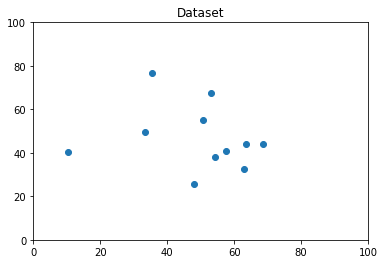

In [424]:
#Visualizing the data 
plt.plot() 
plt.xlim([0, 100]) 
plt.ylim([0, 100]) 
plt.title('Dataset') 
plt.scatter(x, y) 
plt.show() 

In [411]:
Player_Aggs.head()

,shortName,Position,playerId,weight,height,foot,matchId,xStart,yStart,teamId,...,CounterAttackIntercept,SuccessfulInterceptions,InaccurateForwardPasses,AccurateForwardPasses,CornerAssists,PassingAccuracy,shortPassAccuracy,longPassAccuracy,shortLongPassRatio,shotAccuracy
0,M. \u00d6zil,MID,3319,76.0,180.0,left,2499719,63.549020,43.901961,1609,...,0.0,0.94,8.44,22.50,0.0,0.868421,0.857143,0.884615,1.826087,0.00
1,A. Ramsey,MID,7870,76.0,183.0,right,2499719,61.857143,48.333333,1609,...,0.0,0.00,6.43,9.64,0.0,0.777778,0.600000,1.000000,0.750000,0.25
2,T. Walcott,FWD,7879,68.0,176.0,right,2499719,50.250000,86.500000,1609,...,0.0,0.00,0.00,0.00,0.0,1.000000,1.000000,0.000000,0.000000,0.00
3,P. \u010cech,GKP,7882,90.0,196.0,left,2499719,10.380952,40.571429,1609,...,0.0,0.00,0.00,6.77,0.0,1.000000,1.000000,1.000000,0.111111,0.00
4,R. Holding,DEF,370224,75.0,189.0,right,2499719,35.337500,76.550000,1609,...,0.0,1.32,5.29,33.09,0.0,0.796610,0.740741,0.838710,0.769231,0.00


In [ ]:
# identifying playing position with clustering






In [282]:
# # Parsing player positions on field for each match in a season, and adding output to Matches summary dataframe

# for match in matches:
#     trial = trial2[trial2['matchId']== match]
#     refs = list(Matches[Matches['matchId']==match].loc[:,'homePlayer1':'awayBenchPlayer7'].transpose().index)
#     ids = [int(value) for value in Matches[Matches['matchId']==match].loc[:,'homePlayer1':'awayBenchPlayer7'].transpose().values]
#     test = pd.DataFrame(zip(ids, refs), columns = ['playerId', 'playerRefs'])
#     trial = pd.merge(test, trial, on="playerId")
#     pt1 = pd.pivot_table(trial, values = 'xStart', index='matchId', columns = 'playerRefs').reset_index().add_prefix('xPos_')
#     pt1 = pt1.rename(columns = {'xPos_matchId': "matchId"})
#     pt2 = pd.pivot_table(trial, values = 'yStart', index='matchId', columns = 'playerRefs').reset_index().add_prefix('yPos_')
#     pt2 = pt2.rename(columns = {'yPos_matchId': "matchId"})
#     pt = pd.merge(pt1, pt2, on="matchId")
#     temp_df = temp_df.append(pt, ignore_index = True)

# England_Matches = pd.merge(England_Matches, temp_df, on = 'matchId').fillna(0) # consider removing bench players, also consider ignoring goalkeepers






In [283]:
# Likely I will decide to deprecate this

# Create a function to aggregate stats for a match 

# stat is the string representation of stat desired
# unique_df is the unique df developed prior to represent stat grouped by player and match
# def advanced_stats(unique_df, stat, match_df):

#     matches = list(unique_df['matchId'].unique())
#     temp_df = pd.DataFrame()

#     for match in matches:
#         trial = unique_df[unique_df['matchId']== match]
#         refs = list(Matches[Matches['matchId']==match].loc[:,'homePlayer1':'awayBenchPlayer7'].transpose().index)
#         ids = [int(value) for value in Matches[Matches['matchId']==match].loc[:,'homePlayer1':'awayBenchPlayer7'].transpose().values]
#         test = pd.DataFrame(zip(ids, refs), columns = ['playerId', 'playerRefs'])
#         trial = pd.merge(test, trial, on="playerId")
#         pt = pd.pivot_table(trial, values = stat, index='matchId', columns = 'playerRefs').reset_index().add_prefix(stat)
#         pt = pt.rename(columns = {stat + '_matchId': "matchId"})
#     #     pt2 = pd.pivot_table(trial, values = 'yStart', index='matchId', columns = 'playerRefs').reset_index().add_prefix('yPos_')
#     #     pt2 = pt2.rename(columns = {'yPos_matchId': "matchId"})
#     #     pt = pd.merge(pt1, pt2, on="matchId")
#         temp_df = temp_df.append(pt, ignore_index = True)

#     match_df = pd.merge(match_df, temp_df, on = 'matchId').fillna(0) 

#     return match_df



In [284]:

# Simple df selection to remove playerIds that = 0
#Events_England = Events_England[Events_England['playerId']! = 0]


In [287]:
# # Function to transform match events into meaningul player performance profiles for machine learning
# def match_agg(eT, event_df):

#     df1 = pd.DataFrame(event_df[event_df["subEventName"]== eT ][['matchId', "teamId", "subEventName"]])
#     df1 = df1.groupby(['matchId','teamId']).size().to_frame(eT).reset_index()
#     df2 = df1.groupby('matchId').agg(['unique']).reset_index()
#     df3 = pd.DataFrame(None, columns = ['matchId', 'teamId', eT])
#     df3['matchId'], df3['teamId'], df3[eT] = df2.iloc[:, 0], df2.iloc[:,1], df2.iloc[:,2]
#     df4 = pd.concat([df3, pd.DataFrame(df3['teamId'].to_list(), columns=['team1','team2'])], axis=1, sort = False)
#     result = pd.merge(df4, Matches[['matchId', "homeTeamId", "awayTeamId"]], on='matchId', how='inner')
#     result = pd.concat([result, pd.DataFrame(df3[eT].to_list(), columns=[eT+"1",eT+"2"])], axis=1, sort = False)
#     result = result.fillna(0) # handle na values where teams had no corners in a match

#     # fill in zeros to teams where there were no corners for a team
#     result[eT] = result[eT].apply(lambda row: list(row)+[0] if len(row)==1 else row)

#     # Correctly apply allocate home and away aggregate statistics to correct teams
#     result['home'+eT] = (
#         np.select(
#             condlist=[result['team1'] == result['homeTeamId'], result['team2'] == result['homeTeamId']], 
#             choicelist=[result[eT+"1"], result[eT+"2"]]))

#     result['away'+eT] = (
#         np.select(
#             condlist=[result['team1'] == result['awayTeamId'], result['team2'] == result['awayTeamId']], 
#             choicelist=[result[eT+"1"], result[eT+"2"]]))
    
#     # Create a column to recognize when a goal is scored
#     conditions = [
#         (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Success"))),
#         (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Failure") & (result['subEventName'] == "Shot"))),
#         (((result['subEventDescription'].str.match('goal ')) & (result['Result'] == "Failure") & (result['subEventName'] != "Shot")))
#         ]

#     # create a list of the values we want to assign for each condition
#     values = [1, 1, -1]

#     # create a new column and use np.select to assign values to it using our lists as arguments
#     result['Goal_Value'] = np.select(conditions, values, default = 0)
    
#     #result = result[result['playerId']!= 0]

#     # # drop useless columns that have been replaced
#     result.drop(['teamId', eT, "team1", "team2", eT+"1", eT+"2"], inplace = True, axis = 1 )
    
#     return result

### Data Processing

In [291]:
#Match_TeamStats = pd.read_sql_query("SELECT * FROM football_data", sql_conn)

In [292]:
# # parsing betting odds variables from analysis
# drop_columns = ["B365H","B365D","B365A","BSH","BSD","BSA","BWH","BWD","BWA","GBH","GBD","GBA","IWH","IWD","IWA","LBH","LBD","LBA",
# "PSH", "PH","PSD", "PD","PSA", "PA","SOH","SOD","SOA","SBH","SBD","SBA","SJH","SJD","SJA","SYH","SYD","SYA","VCH",
# "VCD","VCA","WHH","WHD","WHA","Bb1X2","BbMxH","BbAvH","BbMxD","BbAvD","BbMxA","BbAvA","MaxH","MaxD","MaxA",
# "AvgH","AvgD","AvgA","BbOU","BbMx>2.5","BbAv>2.5","BbMx<2.5","BbAv<2.5","GB>2.5","GB<2.5","B365>2.5","B365<2.5",
# "P>2.5","P<2.5","Max>2.5","Max<2.5","Avg>2.5","Avg<2.5","BbAH","BbAHh","AHh","BbMxAHH","BbAvAHH","BbMxAHA",
# "BbAvAHA","GBAHH","GBAHA","GBAH","LBAHH","LBAHA","LBAH","B365AHH","B365AHA","B365AH","PAHH", "AvgC<2.5",
# "PAHA","MaxAHH","MaxAHA","AvgAHH","AvgAHA","WHCH","WHCD","WHCA", "VCCH", "VCCA", "PSCH", "PSCD", "PCAHH", "PCAHA", "PC>2.5", "PC<2.5", "MaxCH", "MaxCAHH", "MaxCD",
# "MaxCAHA", "MaxCA", "MaxC>2.5", "MaxC<2.5", "IWCH", "IWCD", "IWCA", "AvgC>2.5","AvgCA","AvgCAHA","AvgCAHH",
# "AvgCD","AvgCH","B365C<2.5","B365C>2.5","B365CA","B365CAHA","B365CAHH","B365CD","B365CH","BWCA", "BWCD", "BWCH", "VCCD", "PSCA"] 

In [293]:
# Match_TeamStats.drop(drop_columns, inplace=True, axis =1) # removing betting odds from dataframe